In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
!pip install praw

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 191.0/191.0 kB 2.3 MB/s eta 0:00:00


In [3]:
import praw

In [4]:
reddit = praw.Reddit(client_id='EQHciCl7TGA_z5gFzM5Jtg',
                     client_secret='iCcYUtz6ENDCi9Rtj_p0jBc_LdApYg',
                     user_agent='newapp')

In [5]:
headlines = set()
#a set for our headlines so we don't get duplicates when running multiple times

In [6]:
#we iterating through the /r/politics subreddit using the API client
for submission in reddit.subreddit('politics').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

928


In [9]:
  import nltk
  nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\coolb\AppData\Roaming\nltk_data...


True

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.4019,
  'headline': 'Immigration to Boost US GDP by $7 Trillion Over Decade, CBO Says',
  'neg': 0.0,
  'neu': 0.803,
  'pos': 0.197},
 {'compound': -0.4615,
  'headline': "Trump's 'remarkably dishonest acceptance speech' at the RNC devolved into boring TV",
  'neg': 0.339,
  'neu': 0.485,
  'pos': 0.177},
 {'compound': 0.0,
  'headline': "Why won't George W. Bush talk publicly about Donald Trump? It's simple",
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [11]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,0.803,0.197,0.4019,Immigration to Boost US GDP by $7 Trillion Ove...
1,0.339,0.485,0.177,-0.4615,Trump's 'remarkably dishonest acceptance speec...
2,0.000,1.000,0.000,0.0000,Why won't George W. Bush talk publicly about D...
3,0.000,1.000,0.000,0.0000,'Agency in crisis': Secret Service has decade-...
4,0.000,1.000,0.000,0.0000,Menendez Conviction Is a Rare Public Corruptio...


In [12]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

# We are creating a positive label of 1 if the compound is greater than 0.2, and a label of -1 if compound is less than -0.2.

,neg,neu,pos,compound,headline,label
0,0.000,0.803,0.197,0.4019,Immigration to Boost US GDP by $7 Trillion Ove...,1
1,0.339,0.485,0.177,-0.4615,Trump's 'remarkably dishonest acceptance speec...,-1
2,0.000,1.000,0.000,0.0000,Why won't George W. Bush talk publicly about D...,0
3,0.000,1.000,0.000,0.0000,'Agency in crisis': Secret Service has decade-...,0
4,0.000,1.000,0.000,0.0000,Menendez Conviction Is a Rare Public Corruptio...,0


In [13]:
df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [14]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Immigration to Boost US GDP by $7 Trillion Over Decade, CBO Says',
 "Gov. Beshear signs driver's license agreement between Kentucky and South Korea",
 'At a WWE-infused RNC, Trump seemed like a washed-up wrestler Trump’s RNC speech droned on for what seemed like an eternity. And his faux machismo, combined with his meandering diatribes, had him '
 'sounding like a wrestler past his prime.',
 'The 18 best (& funniest) comments about Trump’s rambling acceptance speech that put people to sleep',
 "Biden won't drop out, campaign insists in a new memo"]

Negative headlines:

["Trump's 'remarkably dishonest acceptance speech' at the RNC devolved into boring TV",
 'Trump urges unity after assassination attempt while proposing sweeping populist agenda in RNC finale',
 'Trump Site Launches Limited-Edition Assassination Attempt Sneakers',
 'Heinrich calls on Biden to drop out of US presidential race',
 'California judge sides with elementary school against 7-year-old girl 

In [15]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

label
 0    454
-1    268
 1    206
Name: count, dtype: int64
label
 0    48.922414
-1    28.879310
 1    22.198276
Name: proportion, dtype: float64


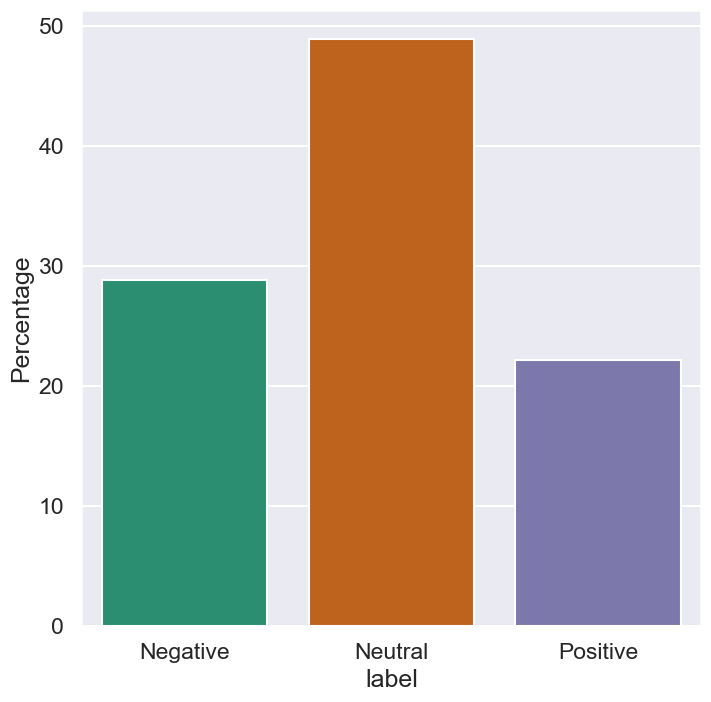

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [17]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [18]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [19]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [20]:
import pandas as pd
import string

# Load the CSV file
file_path = r'C:\Users\coolb\Desktop\AI\Sem 2\Infra\reddit_headlines_labels.csv'
df = pd.read_csv(file_path)

# Function to remove punctuation from a given text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the function to the 'headline' column
df['headline'] = df['headline'].apply(remove_punctuation)

# Display the first few rows of the modified dataframe
print(df.head())

# Save the modified dataframe to a new CSV file
output_file_path = r'C:\Users\coolb\Desktop\AI\Sem 2\Infra\reddit_headlines_labels_no_punctuation.csv'
df.to_csv(output_file_path, index=False)


                                            headline  label
0  Immigration to Boost US GDP by 7 Trillion Over...      1
1  Trumps remarkably dishonest acceptance speech ...     -1
2  Why wont George W Bush talk publicly about Don...      0
3  Agency in crisis Secret Service has decadeold ...      0
4  Menendez Conviction Is a Rare Public Corruptio...      0
